In [5]:
# %load fonts.py
#!/usr/bin/env python

# In[ ]:


# matplotlib 한글 폰트 문제 해결
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import platform

if platform.system() == 'Darwin':         # mac
    plt.rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)



In [7]:
titanic = sns.load_dataset('titanic')
titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


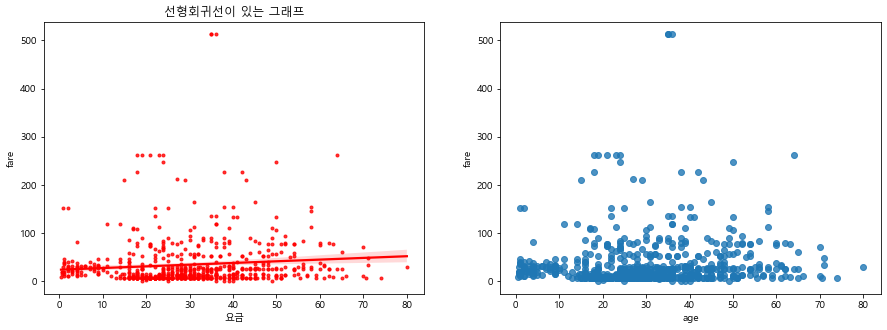

In [13]:
# seaborn 을 활용하여회귀선이 있는 산점도 그리기
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형 회귀선 표시
sns.regplot(x='age',
           y='fare',
           data=titanic,
           ax=ax1,
           color='red',
           marker='.')
# 선형 회귀선 표시x
sns.regplot(x='age',
           y='fare',
           data=titanic,
           ax=ax2,
           fit_reg=False)
ax1.set_title('선형회귀선이 있는 그래프')
ax1.set_xlabel('나이')
ax1.set_xlabel('요금')


plt.show()


C:\Users\HPE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


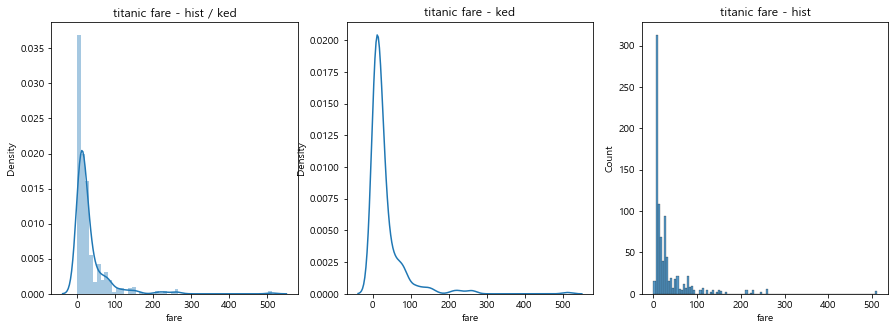

In [16]:
# 히스토그램 / 커널 밀도 함수
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

#distplot
sns.distplot(titanic['fare'],ax=ax1)

# kdplot
sns.kdeplot(x='fare', data=titanic, ax=ax2)

# histplot
sns.histplot(x='fare', data=titanic,ax=ax3)

ax1.set_title('titanic fare - hist / ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

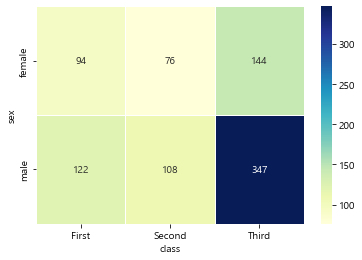

In [20]:
# 히트맵
table = titanic.pivot_table(index=['sex'],columns=['class'],
                           aggfunc='size')
table

#heatmap 그리기
sns.heatmap(table,
           annot=True, fmt='d',    #그룹함수의 결과를 표시, 정수로
           cmap='YlGnBu',       # 원하는 컬러 맵
           linewidths=.5,          #구분선의 사이즈
           cbar=True)              #오른쪽 선

plt.show()

In [21]:
sns.__version__

'0.11.2'

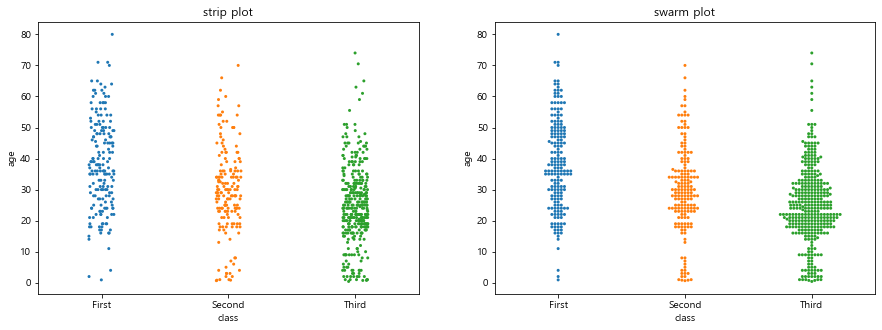

In [26]:
# 범주형 데이터 산점도
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포, 데이터 분산 미고려 (중복 표시)
sns.stripplot(x='class',
             y='age',
             data=titanic,
             size=3,
             ax = ax1)
sns.swarmplot(x='class',
             y='age',
             data=titanic,
             size=3,
             ax = ax2)

ax1.set_title('strip plot')
ax2.set_title('swarm plot')

plt.show()

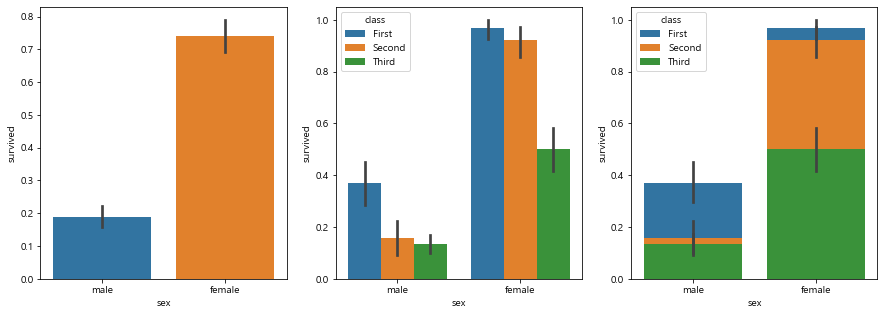

In [28]:
# 막대 그래프 : barplot()
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)
sns.barplot(x='sex',y='survived',data=titanic, hue= 'class' ,ax=ax2)
sns.barplot(x='sex',y='survived',data=titanic, hue= 'class' ,
            dodge=False, ax=ax3)

plt.show()

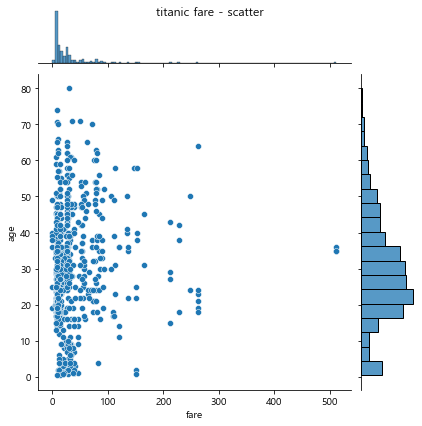

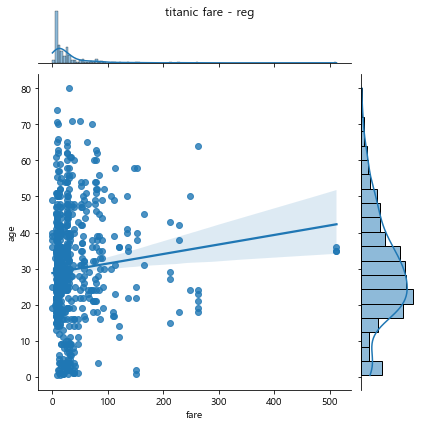

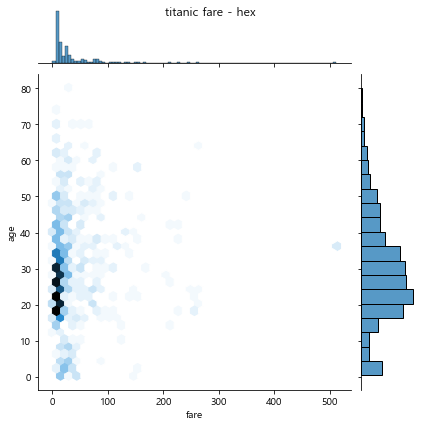

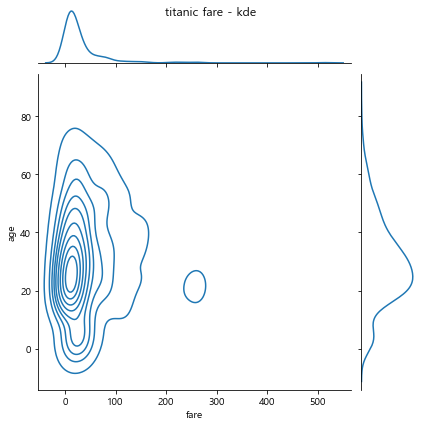

In [33]:
# 조인트 그래프 : jointplot() -> 산점도를 기본, x-y축 변수에 대한 히스토그램

# 조인트 기본
j1 = sns.jointplot(x='fare',y='age',data=titanic)
# 회귀선 있는 조인트
j2 = sns.jointplot(x='fare',y='age',data=titanic,kind='reg')
# 조인트 육각 그래프
j3 = sns.jointplot(x='fare',y='age',data=titanic,kind='hex')
# 조인트 커널밀집 그래프
j4 = sns.jointplot(x='fare',y='age',data=titanic,kind='kde')

j1.fig.suptitle('titanic fare - scatter')
j2.fig.suptitle('titanic fare - reg')
j3.fig.suptitle('titanic fare - hex')
j4.fig.suptitle('titanic fare - kde')

plt.show()